In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')





In [44]:
obesity=pd.read_csv('obesity.csv')
obesity

,Gender,Age,Height,Weight,familyhistorywithoverweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,PublicTransportation,NormalWeight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,PublicTransportation,NormalWeight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,PublicTransportation,NormalWeight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,OverweightLevelI
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,PublicTransportation,OverweightLevelII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,PublicTransportation,ObesityTypeIII
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,PublicTransportation,ObesityTypeIII
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,PublicTransportation,ObesityTypeIII
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,PublicTransportation,ObesityTypeIII


In [45]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'familyhistorywithoverweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [46]:
obesity.dtypes

Gender                          object
Age                            float64
Height                         float64
Weight                         float64
familyhistorywithoverweight     object
FAVC                            object
FCVC                           float64
NCP                            float64
CAEC                            object
SMOKE                           object
CH2O                           float64
SCC                             object
FAF                            float64
TUE                            float64
CALC                            object
MTRANS                          object
NObeyesdad                      object
dtype: object

In [47]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [48]:
obesity.isna().sum()

Gender                         0
Age                            0
Height                         0
Weight                         0
familyhistorywithoverweight    0
FAVC                           0
FCVC                           0
NCP                            0
CAEC                           0
SMOKE                          0
CH2O                           0
SCC                            0
FAF                            0
TUE                            0
CALC                           0
MTRANS                         0
NObeyesdad                     0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Gender=le.fit_transform(obesity['Gender'])
familyhistorywithoverweight=le.fit_transform(obesity['familyhistorywithoverweight'])
FAVC=le.fit_transform(obesity['FAVC'])
CAEC=le.fit_transform(obesity['CAEC'])
SMOKE=le.fit_transform(obesity['SMOKE'])
SCC=le.fit_transform(obesity['SCC'])
CALC=le.fit_transform(obesity['CALC'])
MTRANS=le.fit_transform(obesity['MTRANS'])
NObeyesdad=le.fit_transform(obesity['NObeyesdad'])


obesity['Gender']=Gender
obesity['familyhistorywithoverweight']=familyhistorywithoverweight
obesity['FAVC']=FAVC
obesity['CAEC']=CAEC
obesity['SMOKE']=SMOKE
obesity['SCC']=SCC
obesity['CALC']=CALC
obesity['MTRANS']=MTRANS
obesity['NObeyesdad']=NObeyesdad



In [50]:
obesity_cor=obesity.corr()
obesity_cor

,Gender,Age,Height,Weight,familyhistorywithoverweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,0.024908
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.044487,-0.601945,0.236170
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.038986
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.387643
familyhistorywithoverweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.313667
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.044582
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.018522
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.092616
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.327295
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.023256


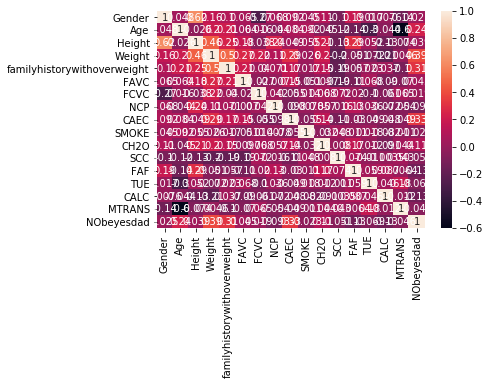

In [51]:
sns.heatmap(obesity_cor,annot=True)

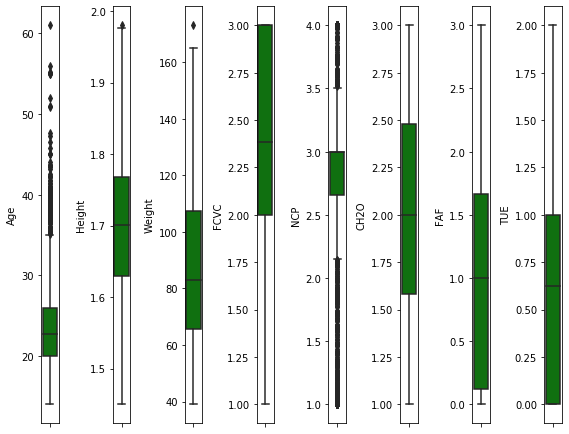

In [52]:
obesity_boxplot=obesity.loc[:,['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]
collist=obesity_boxplot.columns
plt.figure(figsize=(10,60))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.boxplot(obesity_boxplot[collist[i]],color='green',orient='v')
    plt.tight_layout()

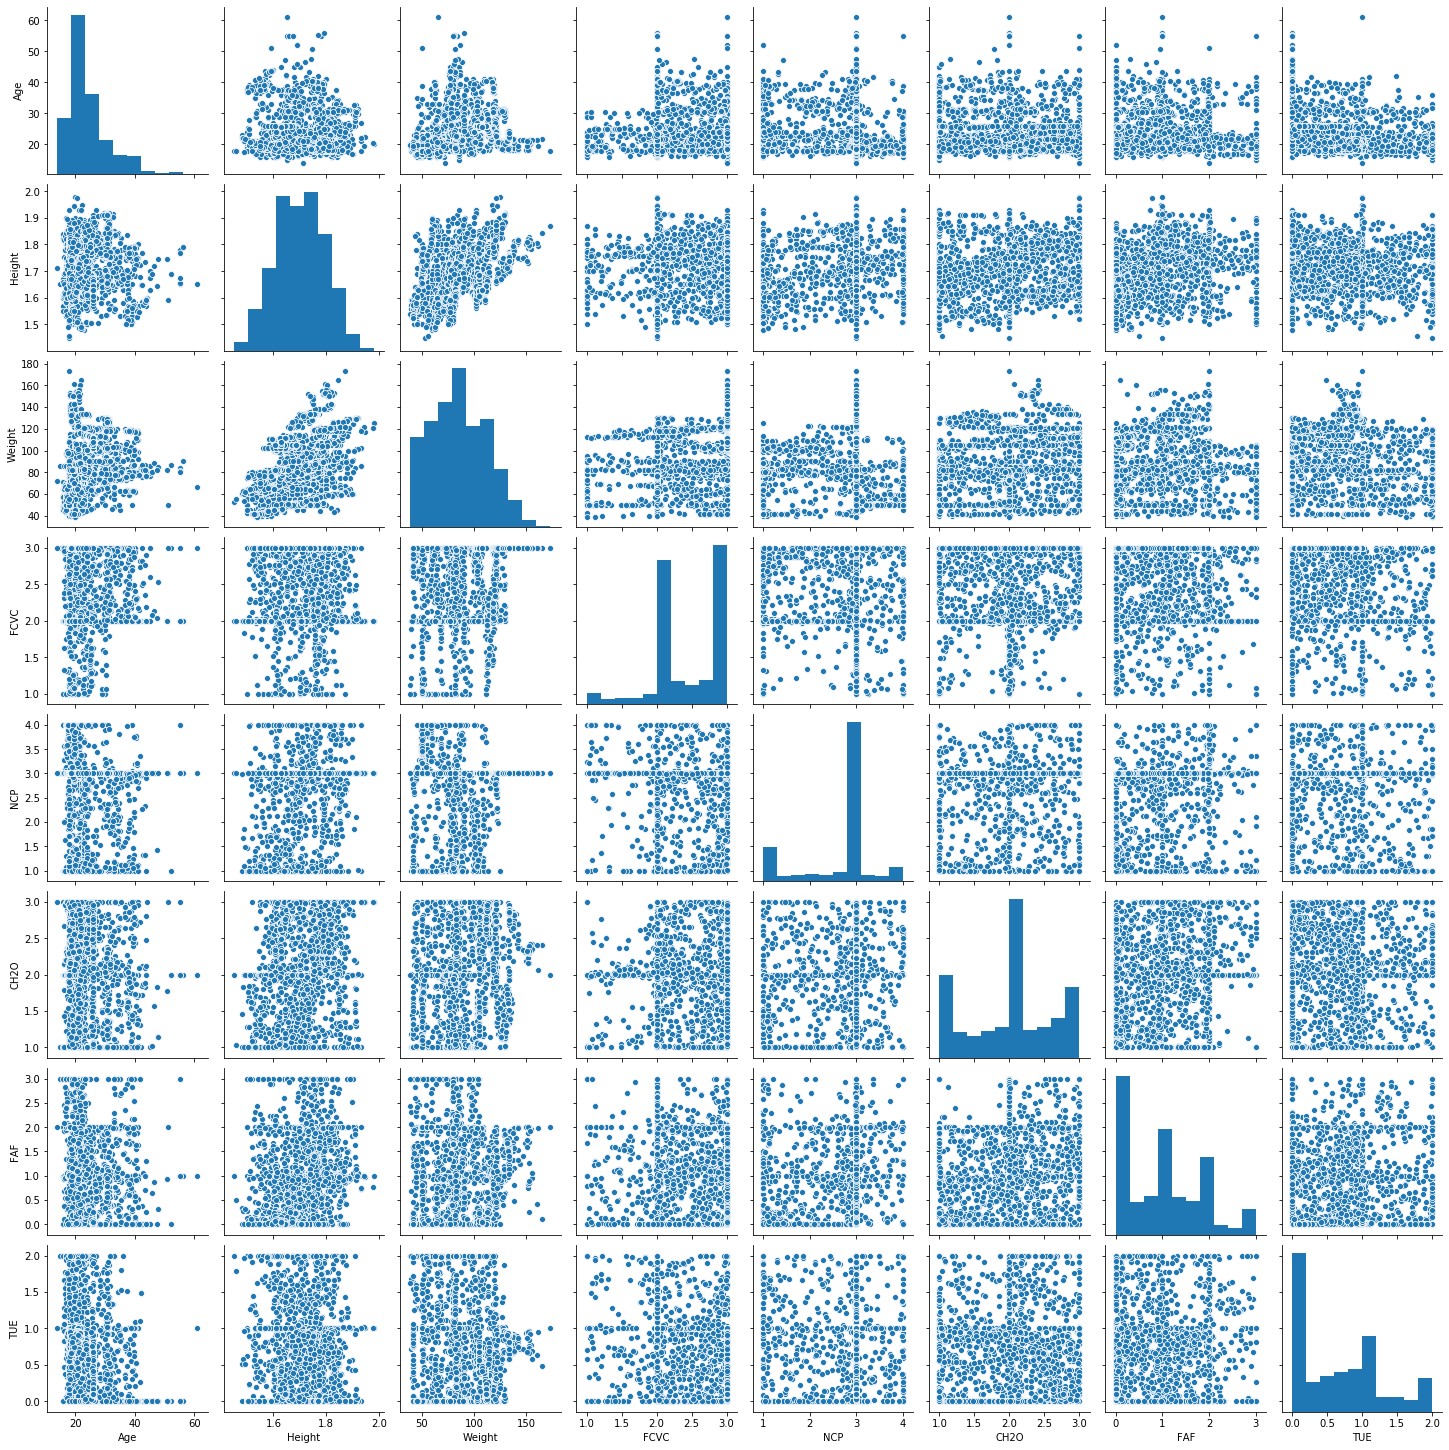

In [53]:
sns.pairplot(obesity_boxplot)

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(obesity_cor))
z

array([[3.12314652e+00, 3.68046248e-02, 1.53727765e+00, 1.12466625e-01,
        2.22947267e-01, 9.49557932e-02, 1.31472304e+00, 5.55348984e-02,
        5.85696768e-02, 7.90317276e-02, 7.17173812e-02, 4.16947734e-01,
        3.93519737e-01, 1.41792828e-01, 1.66173367e-02, 5.08478946e-01,
        3.31183041e-01],
       [2.52431945e-01, 3.11027111e+00, 7.20112160e-01, 3.06703038e-02,
        1.70573739e-01, 9.89846245e-02, 1.71057772e-01, 5.10888274e-01,
        8.89467406e-02, 1.19655401e-01, 7.24420048e-01, 4.68705808e-01,
        9.18468604e-01, 1.37196080e+00, 2.19362414e-01, 2.10034133e+00,
        4.45810645e-01],
       [1.76975318e+00, 2.03336195e-01, 2.87377306e+00, 9.42769686e-01,
        3.30549200e-01, 3.47826647e-01, 3.85053569e-01, 6.63240338e-01,
        2.24863514e-01, 3.36498880e-02, 3.77433931e-01, 5.34951376e-01,
        8.05699072e-01, 6.16040517e-03, 5.51070029e-01, 2.89351072e-01,
        2.79405291e-01],
       [1.49376424e-01, 5.34724821e-01, 9.93163011e-01, 2.821

In [55]:
threshold=3
print(np.where(z>3))

(array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64), array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64))


In [56]:
#no outliers are present

In [57]:
obesity

,Gender,Age,Height,Weight,familyhistorywithoverweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [58]:
x=obesity.iloc[:,0:16]
x

,Gender,Age,Height,Weight,familyhistorywithoverweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [59]:
y=obesity.iloc[:,16:17]
y

,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [61]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
print(mnb.score(x_train,y_train))
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6014580801944107
0.6258064516129033
[[43  5  0  0  0  3  0]
 [16 27  5  1  0 10  5]
 [ 0  0 31 26 10  1  9]
 [ 0  0 13 70  0  0  1]
 [ 0  0  0  1 75  0  0]
 [ 4  6  9  3  0 21 14]
 [ 0  6 20  1  0  5 24]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        51
           1       0.61      0.42      0.50        64
           2       0.40      0.40      0.40        77
           3       0.69      0.83      0.75        84
           4       0.88      0.99      0.93        76
           5       0.53      0.37      0.43        57
           6       0.45      0.43      0.44        56

    accuracy                           0.63       465
   macro avg       0.61      0.61      0.60       465
weighted avg       0.61      0.63      0.61       465



In [62]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
0.9333333333333333
[[49  2  0  0  0  0  0]
 [ 2 51  0  0  0 10  1]
 [ 0  0 75  2  0  0  0]
 [ 0  0  3 80  1  0  0]
 [ 0  0  0  0 76  0  0]
 [ 0  2  0  0  0 51  4]
 [ 0  0  1  0  0  3 52]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.93      0.80      0.86        64
           2       0.95      0.97      0.96        77
           3       0.98      0.95      0.96        84
           4       0.99      1.00      0.99        76
           5       0.80      0.89      0.84        57
           6       0.91      0.93      0.92        56

    accuracy                           0.93       465
   macro avg       0.93      0.93      0.93       465
weighted avg       0.94      0.93      0.93       465



In [63]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))


0.9046172539489672
0.8666666666666667
[[51  0  0  0  0  0  0]
 [10 29  1  0  0 20  4]
 [ 0  0 72  0  0  0  5]
 [ 0  0  2 81  1  0  0]
 [ 0  0  0  1 75  0  0]
 [ 0  3  3  0  0 47  4]
 [ 0  2  4  1  0  1 48]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        51
           1       0.85      0.45      0.59        64
           2       0.88      0.94      0.91        77
           3       0.98      0.96      0.97        84
           4       0.99      0.99      0.99        76
           5       0.69      0.82      0.75        57
           6       0.79      0.86      0.82        56

    accuracy                           0.87       465
   macro avg       0.86      0.86      0.85       465
weighted avg       0.87      0.87      0.86       465



In [64]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    print(svc.score(x_train,y_train))
    svcpred=svc.predict(x_test)
    print(accuracy_score(y_test,svcpred))
    print(confusion_matrix(y_test,svcpred))
    print(classification_report(y_test,svcpred))



In [65]:
svmkernel('rbf')

0.5923450789793439
0.5634408602150538
[[44  7  0  0  0  0  0]
 [15 27  0  0  0 21  1]
 [ 0  0 27  5 17  2 26]
 [ 0  0 10 34 40  0  0]
 [ 0  0  3  0 73  0  0]
 [ 3 14  2  0  0 24 14]
 [ 0  6 12  0  0  5 33]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        51
           1       0.50      0.42      0.46        64
           2       0.50      0.35      0.41        77
           3       0.87      0.40      0.55        84
           4       0.56      0.96      0.71        76
           5       0.46      0.42      0.44        57
           6       0.45      0.59      0.51        56

    accuracy                           0.56       465
   macro avg       0.58      0.57      0.55       465
weighted avg       0.59      0.56      0.55       465



In [66]:
svmkernel('poly')

0.6008505467800729
0.5870967741935483
[[47  4  0  0  0  0  0]
 [18 27  0  0  0 18  1]
 [ 0  0 39  3  6  5 24]
 [ 0  0 10 36 38  0  0]
 [ 0  0  4  0 72  0  0]
 [ 3 16  2  0  0 23 13]
 [ 0  7 12  0  0  8 29]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        51
           1       0.50      0.42      0.46        64
           2       0.58      0.51      0.54        77
           3       0.92      0.43      0.59        84
           4       0.62      0.95      0.75        76
           5       0.43      0.40      0.41        57
           6       0.43      0.52      0.47        56

    accuracy                           0.59       465
   macro avg       0.60      0.59      0.57       465
weighted avg       0.61      0.59      0.58       465



In [67]:
svmkernel('linear')

0.9009720534629405
0.864516129032258
[[51  0  0  0  0  0  0]
 [10 42  0  0  0 11  1]
 [ 0  0 71  3  0  0  3]
 [ 0  0  2 82  0  0  0]
 [ 0  0  0  0 76  0  0]
 [ 0  6  2  0  0 43  6]
 [ 0  0 13  0  0  6 37]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        51
           1       0.88      0.66      0.75        64
           2       0.81      0.92      0.86        77
           3       0.96      0.98      0.97        84
           4       1.00      1.00      1.00        76
           5       0.72      0.75      0.74        57
           6       0.79      0.66      0.72        56

    accuracy                           0.86       465
   macro avg       0.86      0.85      0.85       465
weighted avg       0.87      0.86      0.86       465



In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9655913978494624
[[50  1  0  0  0  0  0]
 [ 1 59  0  0  0  3  1]
 [ 0  0 75  0  0  0  2]
 [ 0  0  0 84  0  0  0]
 [ 0  0  0  0 76  0  0]
 [ 0  6  0  0  0 50  1]
 [ 0  1  0  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.88      0.92      0.90        64
           2       1.00      0.97      0.99        77
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        76
           5       0.94      0.88      0.91        57
           6       0.93      0.98      0.96        56

    accuracy                           0.97       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.97      0.97      0.97       465



In [69]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.26881720430107525
[[ 2 49  0  0  0  0  0]
 [ 0 34  0  0  0  3 27]
 [ 0  1 40  0  0  0 36]
 [ 0  0 84  0  0  0  0]
 [ 0  0 76  0  0  0  0]
 [ 0  6  0  0  0  1 50]
 [ 0  2  6  0  0  0 48]]
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        51
           1       0.37      0.53      0.44        64
           2       0.19      0.52      0.28        77
           3       0.00      0.00      0.00        84
           4       0.00      0.00      0.00        76
           5       0.25      0.02      0.03        57
           6       0.30      0.86      0.44        56

    accuracy                           0.27       465
   macro avg       0.30      0.28      0.18       465
weighted avg       0.26      0.27      0.17       465



In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.9634408602150538
[[50  1  0  0  0  0  0]
 [ 1 60  0  0  0  3  0]
 [ 0  0 76  1  0  0  0]
 [ 0  0  2 82  0  0  0]
 [ 0  0  0  1 75  0  0]
 [ 0  3  0  0  0 50  4]
 [ 0  0  1  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.94      0.94      0.94        64
           2       0.96      0.99      0.97        77
           3       0.98      0.98      0.98        84
           4       1.00      0.99      0.99        76
           5       0.94      0.88      0.91        57
           6       0.93      0.98      0.96        56

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

mnb=MultinomialNB()
score=cross_val_score(mnb,x,y,cv=5)
print('score: ',score)
print('mean score: ',score.mean())
print('standard deviation: ',score.std())

y_pred=cross_val_predict(mnb,x,y,cv=5)
print('y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)
accuracy_score(y,y_pred)

score:  [0.55555556 0.58767773 0.56161137 0.61848341 0.58767773]
mean score:  0.582201158504476
standard deviation:  0.02240676179871911
y prediction values
[6 1 6 ... 4 4 4]
[[216  46   0   0   0   6   4]
 [ 69 114  16   3   0  48  37]
 [  0   5 127  94  33  11  81]
 [  0   0  50 233   1   0  13]
 [  0   0   0   2 322   0   0]
 [  7  30  72   7   2 113  59]
 [  0  33 111  13   1  28 104]]


0.5821885362387494

In [80]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    
    score=cross_val_score(svc,x,y,cv=5)
    print('accuracy scores: ',score)
    print('mean score ',score.mean())
    print('standard deviation ', score.std())
    
    y_pred=cross_val_predict(svc,x,y,cv=5)
    print(y_pred)
    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)
    print(accuracy_score(y,y_pred))

In [81]:
svmkernel('rbf')

accuracy scores:  [0.61465721 0.62322275 0.56635071 0.50947867 0.57345972]
mean score  0.5774338117486246
standard deviation  0.04059245647544199
[1 0 5 ... 4 4 4]
[[237  35   0   0   0   0   0]
 [ 91 117   1   0   0  65  13]
 [  0   0 128  30  57   4 132]
 [  0   0  36 172  89   0   0]
 [  0   0  37  33 254   0   0]
 [  8  50  19   0   0 153  60]
 [  0  22  66   1   0  43 158]]
0.5774514448128849


In [82]:
svmkernel('poly')

accuracy scores:  [0.59338061 0.59952607 0.62796209 0.54265403 0.61848341]
mean score  0.5964012414148544
standard deviation  0.029635656763826464
[1 0 5 ... 4 4 4]
[[245  27   0   0   0   0   0]
 [ 97 129   0   0   0  49  12]
 [  0   0 150  25  27  11 138]
 [  0   0  41 151 105   0   0]
 [  0   0  14   0 310   0   0]
 [  9  79  11   0   0 132  59]
 [  0  27  56   1   0  64 142]]
0.5963998105163429


In [84]:
svmkernel('linear')

accuracy scores:  [0.74704492 0.8957346  0.89336493 0.91469194 0.92417062]
mean score  0.8750014005131479
standard deviation  0.06501214834347539
[6 1 1 ... 4 4 4]
[[267   5   0   0   0   0   0]
 [ 41 203   0   0   0  34   9]
 [  0   0 321  13   0   6  11]
 [  0   0   7 289   1   0   0]
 [  0   0   1   1 322   0   0]
 [  0  28   4   0   0 232  26]
 [  0   4  34   0   0  39 213]]
0.8749407863571766


In [86]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print('accuracy_score= ',score)
print('mean scores= ', score.mean())
print('standard deviation=',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)
accuracy_score(y,y_pred)


accuracy_score=  [0.8321513  0.9549763  0.94312796 0.94312796 0.95734597]
mean scores=  0.9261458998577078
standard deviation= 0.047363281708737055
[1 1 1 ... 4 4 4]
[[255  17   0   0   0   0   0]
 [ 17 238   0   0   0  29   3]
 [  0   0 328   8   0   1  14]
 [  0   0   7 288   1   0   1]
 [  0   0   1   0 323   0   0]
 [  0  26   0   0   0 254  10]
 [  0   0  12   0   0  18 260]]


0.9218379914732354

In [79]:
knn=KNeighborsClassifier()  
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print('Accuracy score: ',score)
print('mean scores: ', score.mean())
print('standard deviation: ',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)
accuracy_score(y,y_pred)

Accuracy score:  [0.78773585 0.82938389 0.90521327 0.8436019  0.88625592 0.90521327
 0.84834123 0.90521327 0.92890995 0.90047393]
mean scores:  0.8740342484127694
standard deviation:  0.04219418343198205
[6 0 5 ... 4 4 4]
[[265   7   0   0   0   0   0]
 [ 63 151   5   0   0  55  13]
 [  0   0 325   5   3   1  17]
 [  0   0   5 286   4   0   2]
 [  0   0   0   3 321   0   0]
 [  2  15   8   0   0 250  15]
 [  0   2  19   3   0  11 255]]


0.8777830412126955

In [87]:
# gradient boost classifer has more accuracy score than other classifiers
#saving the gradient boost model

In [88]:
from sklearn.externals import joblib
joblib.dump(gb,'gbsave.obj')
gb_from_joblib=joblib.load('gbsave.obj')
predict=cross_val_predict(gb_from_joblib,x,y,cv=5)
print(predict)

[6 1 1 ... 4 4 4]
